In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

import nltk

In [9]:
df = pd.read_excel('../data/wordle.xlsx')
df.head(3)

ma_words  \
0  "cigar","rebut","sissy","humph","awake","blush...   

                                            oa_words  
0  "aahed","aalii","aargh","aarti","abaca","abaci...

In [23]:
ma_list = df['ma_words'][0].replace('"','').split()
oa_list = df['oa_words'][0].replace('"','').split()

In [26]:
letters = ['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [28]:
ma_letters = ''.join(ma_list)
oa_letters = ''.join(oa_list)

In [25]:
def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count

In [35]:

ma_letter_counts = {letter:countX(ma_letters, letter) for letter in letters}
print('ma_letter_counts:\n')
print(ma_letter_counts,'\n')
oa_letter_counts = {letter:countX(oa_letters, letter) for letter in letters}
print('oa_letter_counts:\n')
print(oa_letter_counts)

ma_letter_counts:

{'a': 975, 'b': 280, 'c': 475, 'd': 393, 'e': 1230, 'f': 229, 'g': 310, 'h': 387, 'i': 670, 'j': 27, 'k': 210, 'l': 716, 'm': 316, 'n': 573, 'o': 753, 'p': 365, 'q': 29, 'r': 897, 's': 668, 't': 729, 'u': 466, 'v': 152, 'w': 194, 'x': 37, 'y': 424, 'z': 40} 

oa_letter_counts:

{'a': 2214, 'b': 1023, 'c': 1031, 'd': 1152, 'e': 2149, 'f': 628, 'g': 843, 'h': 604, 'i': 1065, 'j': 41, 'k': 298, 'l': 949, 'm': 457, 'n': 747, 'o': 1359, 'p': 292, 'q': 11, 'r': 1228, 's': 1844, 't': 707, 'u': 724, 'v': 144, 'w': 171, 'x': 94, 'y': 578, 'z': 127}


In [7]:
#Now to make an additional df where they are count vecorized with 1 and 2 bigrams for doing eda on comparing words used!

ma = df['ma_words']
oa = df['oa_words']
cvec1 = CountVectorizer(stop_words=None)
cvec1.fit(oa)
oa_vectorized = cvec1.transform(oa)
oa_vectorized_df =  pd.DataFrame(oa_vectorized.todense(), columns=cvec1.get_feature_names())



cvec2 = CountVectorizer(stop_words=None)
cvec2.fit(ma)
ma_vectorized = cvec2.transform(ma)
ma_vectorized_df =  pd.DataFrame(ma_vectorized.todense(), columns=cvec2.get_feature_names())
ma_vectorized_df.head(3)

aback  abase  abate  abbey  abbot  abhor  abide  abled  abode  abort  ...  \
0      1      1      1      1      1      1      1      1      1      1  ...   

   wryly  yacht  yearn  yeast  yield  young  youth  zebra  zesty  zonal  
0      1      1      1      1      1      1      1      1      1      1  

[1 rows x 2309 columns]

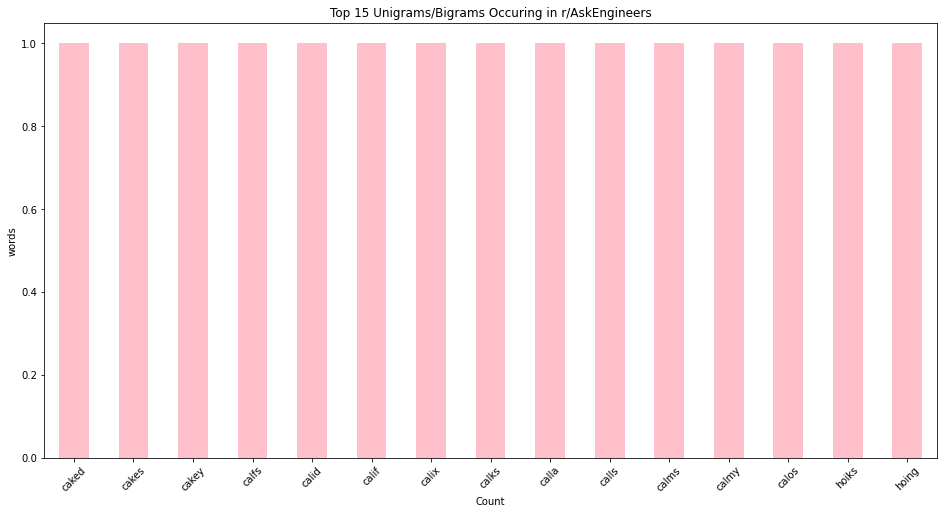

In [8]:
#make comparisoin hbar chart of most common words in both subreddits/ did they have overlap? 
plt.figure(figsize=(16, 8))
oa_vectorized_df.sum().sort_values(ascending = True).tail(15).plot.bar(color = 'pink');
plt.xlabel('Count')
plt.ylabel('words')
plt.xticks(rotation = 45)
plt.title('Top 15 Unigrams/Bigrams Occuring in r/AskEngineers')
plt.savefig('../visualizations/ae_top15.png', dpi = 300, bbox_inches = 'tight')

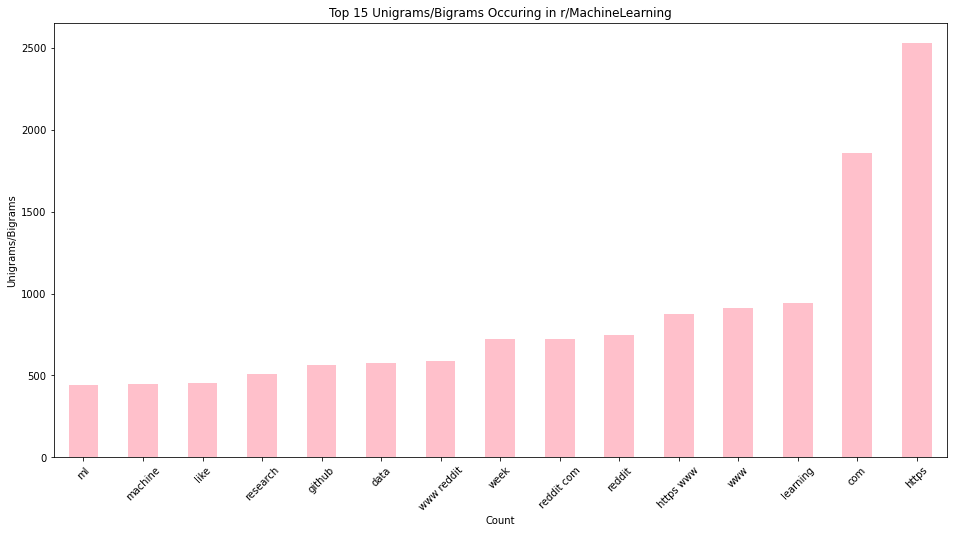

In [102]:
plt.figure(figsize=(16, 8))
ml_vectorized_df.sum().sort_values(ascending = True).tail(15).plot.bar(color = 'pink');
plt.xlabel('Count')
plt.ylabel('Unigrams/Bigrams')
plt.xticks(rotation = 45)
plt.title('Top 15 Unigrams/Bigrams Occuring in r/MachineLearning')
plt.savefig('../visualizations/ml_top15.png', dpi = 300, bbox_inches = 'tight')

In [33]:
#Looking for common words

ae = engineers_vectorized_df.sum().sort_values(ascending = True).tail(25).index
ml = ml_vectorized_df.sum().sort_values(ascending = True).tail(25).index

common = [x for x in ae if x in ml]
common

['like']

In [ ]:
common_25 = ['like']
common_50 = ['com',
 'https',
 'use',
 'new',
 'people',
 'think',
 'know',
 'time',
 've',
 'just',
 'like',
 'work']